##Time Series Prediction with LSTM Recurrent Neural Networks

[Refer to the original online post for more detail](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)

<img alt="[transformed XY" src="https://i1.wp.com/adventuresinmachinelearning.com/wp-content/uploads/2018/02/Keras-LSTM-tutorial-architecture.png?fit=642%2C669&ssl=1">

In [0]:
# Stacked LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'1-Yk9pn4JWADnlWlSHJYsj8Lvf5ZsknbL'}) # replace the id with id of file you want to access
downloaded.GetContentFile('airline-passengers.csv')

In [0]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

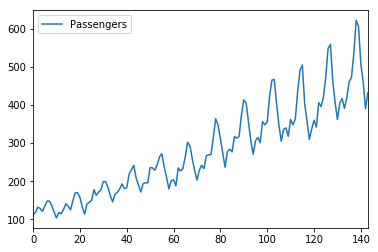

In [0]:
dataframe.plot()

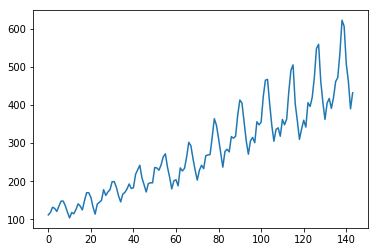

In [0]:
plt.plot(dataset)

In [0]:
dataframe.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

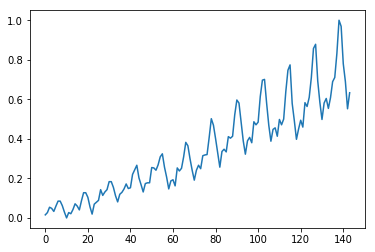

In [0]:
plt.plot(dataset)

In [0]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
print ('trainX.shape[0]=,' , trainX.shape[0],'trainX.shape[1]=', trainX.shape[1])

trainX.shape[0]=, 92 trainX.shape[1]= 3


In [0]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [0]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (1, 3, 4)                 96        
_________________________________________________________________
lstm_11 (LSTM)               (1, 4)                    144       
_________________________________________________________________
dense_4 (Dense)              (1, 1)                    5         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [0]:
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False);
	model.reset_states()

Epoch 1/1
 - 2s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0163
Epoch 1/1
 - 0s - loss: 0.0119
Epoch 1/1
 - 0s - loss: 0.0084
Epoch 1/1
 - 0s - loss: 0.0065
Epoch 1/1
 - 0s - loss: 0.0059
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/

In [0]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [0]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 26.45 RMSE
Test Score: 60.32 RMSE


In [0]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [0]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

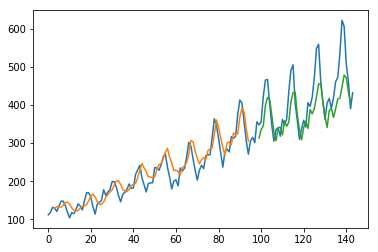

In [0]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()